In [5]:
import pickle
import pandas as pd
with open('dict_results_euclidian_max_norm.pkl', 'rb') as file:
    euclidian_max_norm = pickle.load(file)
    
with open('dict_results_city_block_cosine.pkl', 'rb') as file:
    city_block_cosine = pickle.load(file)
    
euclidian_max_norm_df = pd.DataFrame(euclidian_max_norm)
city_block_cosine_df = pd.DataFrame(city_block_cosine)

results_df = pd.concat([euclidian_max_norm_df, city_block_cosine_df])

In [6]:
results_df

,metric,threshold,seed,val1,test1,val2,test2,val3,test3,val4,...,val7,test7,val8,test8,val9,test9,val10,test10,val11,test11
0,euclidian,0.716062,1,0.250,0.250,0.470,0.465,0.785,0.745,0.870,...,0.890,0.875,0.880,0.875,0.885,0.875,0.885,0.875,0.885,0.875
1,euclidian,0.716062,2,0.340,0.325,0.510,0.485,0.660,0.630,0.865,...,0.890,0.900,0.915,0.900,0.900,0.900,0.895,0.900,0.885,0.900
2,euclidian,0.716062,3,0.270,0.270,0.425,0.395,0.745,0.695,0.795,...,0.880,0.900,0.880,0.900,0.885,0.900,0.885,0.900,0.900,0.905
3,euclidian,0.716062,4,0.250,0.250,0.500,0.480,0.680,0.695,0.830,...,0.900,0.895,0.910,0.900,0.895,0.900,0.900,0.900,0.875,0.900
4,euclidian,0.716062,5,0.250,0.250,0.525,0.530,0.795,0.790,0.845,...,0.895,0.905,0.875,0.905,0.905,0.900,0.900,0.900,0.895,0.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,cosine,0.748010,1,0.460,0.460,0.685,0.650,0.825,0.815,0.870,...,0.875,0.875,0.885,0.875,0.855,0.875,0.885,0.875,0.880,0.875
56,cosine,0.748010,2,0.260,0.250,0.730,0.665,0.810,0.780,0.850,...,0.870,0.875,0.845,0.875,0.855,0.875,0.870,0.875,0.870,0.875
57,cosine,0.748010,3,0.355,0.345,0.670,0.665,0.810,0.815,0.860,...,0.885,0.860,0.880,0.860,0.875,0.860,0.870,0.860,0.880,0.860
58,cosine,0.748010,4,0.250,0.265,0.795,0.775,0.820,0.825,0.830,...,0.860,0.875,0.870,0.875,0.885,0.885,0.880,0.885,0.865,0.885


In [7]:
grouped_df = results_df.groupby(['metric', 'threshold']).mean().reset_index()


average_columns = [f'val{i+1}' for i in range(11)]+[f'test{i+1}' for i in range(11)]
grouped_df[average_columns] = grouped_df.groupby(['metric', 'threshold'])[average_columns].mean().reset_index()[average_columns]

grouped_df

,metric,threshold,seed,val1,test1,val2,test2,val3,test3,val4,...,val7,test7,val8,test8,val9,test9,val10,test10,val11,test11
0,city_block,11.675777,3.0,0.271,0.265,0.485,0.474,0.714,0.694,0.849,...,0.881,0.895,0.886,0.889,0.889,0.894,0.887,0.894,0.880,0.897
1,city_block,12.290292,3.0,0.274,0.273,0.464,0.463,0.724,0.704,0.844,...,0.889,0.897,0.888,0.899,0.894,0.900,0.898,0.902,0.889,0.906
2,city_block,12.471724,3.0,0.273,0.273,0.492,0.477,0.691,0.685,0.844,...,0.875,0.894,0.887,0.902,0.900,0.903,0.897,0.901,0.894,0.901
3,city_block,12.722575,3.0,0.273,0.275,0.544,0.529,0.762,0.735,0.837,...,0.880,0.893,0.897,0.898,0.905,0.897,0.905,0.899,0.895,0.899
4,city_block,13.224153,3.0,0.279,0.272,0.567,0.558,0.714,0.697,0.845,...,0.880,0.889,0.887,0.900,0.891,0.901,0.891,0.904,0.896,0.903
5,city_block,13.885360,3.0,0.281,0.273,0.659,0.619,0.779,0.726,0.844,...,0.889,0.889,0.889,0.890,0.888,0.890,0.898,0.895,0.894,0.899
6,cosine,0.650629,3.0,0.257,0.255,0.593,0.581,0.736,0.722,0.829,...,0.868,0.890,0.877,0.890,0.890,0.900,0.884,0.900,0.891,0.893
7,cosine,0.684872,3.0,0.274,0.267,0.604,0.589,0.768,0.758,0.842,...,0.881,0.880,0.890,0.893,0.889,0.895,0.881,0.895,0.888,0.897
8,cosine,0.692270,3.0,0.283,0.278,0.577,0.555,0.730,0.708,0.825,...,0.873,0.886,0.883,0.889,0.877,0.892,0.878,0.896,0.875,0.897
9,cosine,0.706675,3.0,0.295,0.292,0.590,0.596,0.788,0.779,0.851,...,0.877,0.889,0.891,0.889,0.878,0.892,0.888,0.892,0.892,0.893


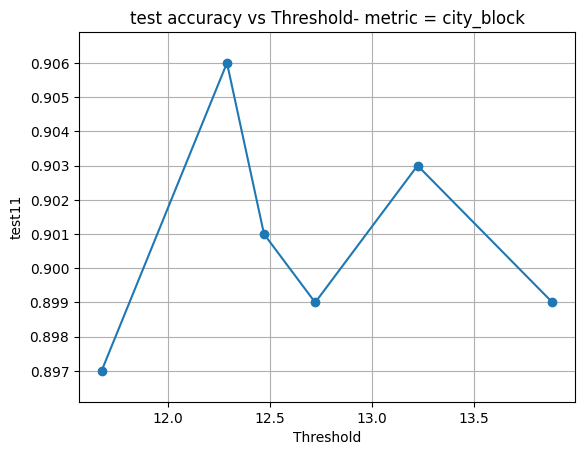

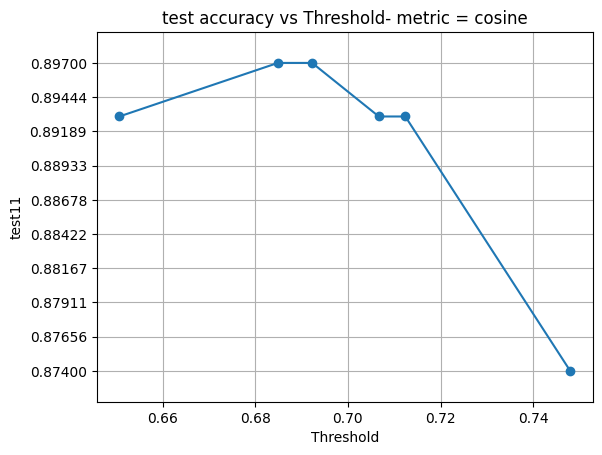

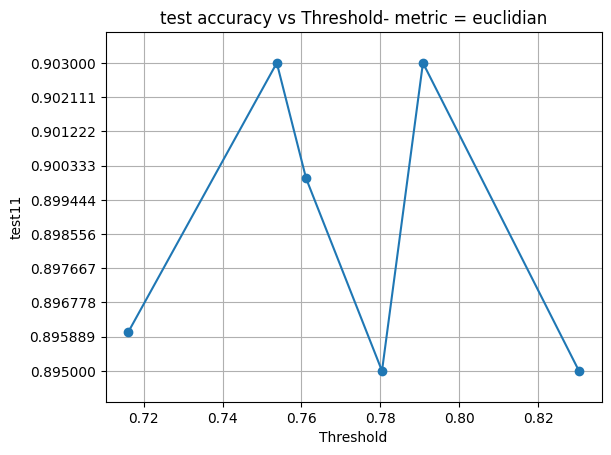

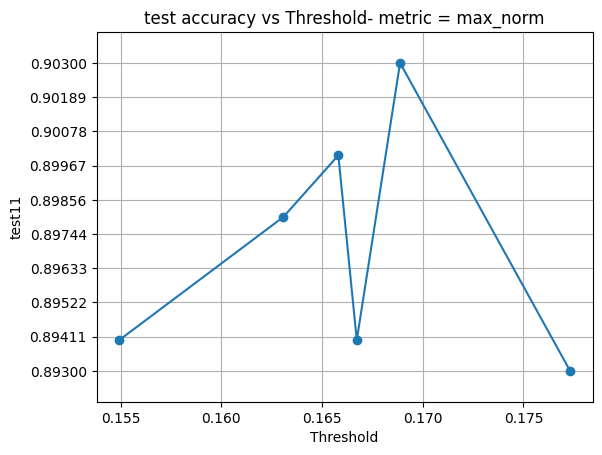

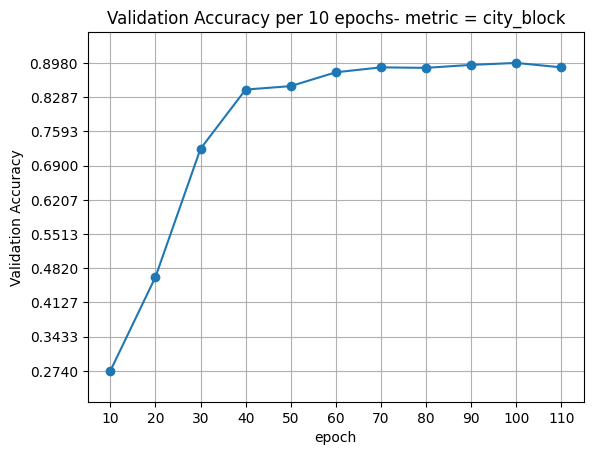

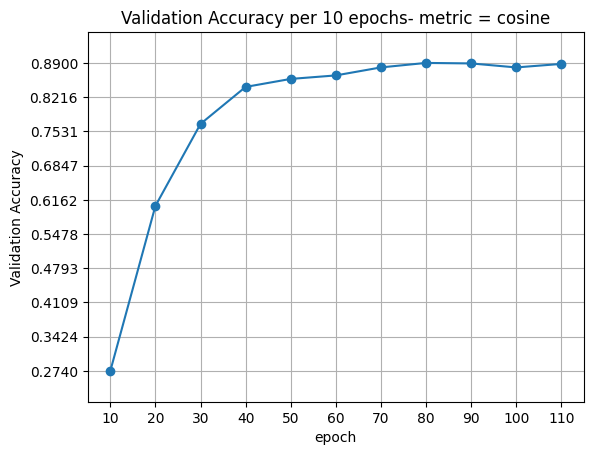

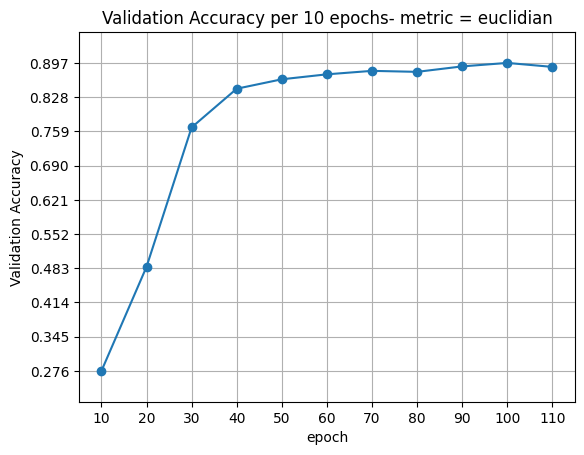

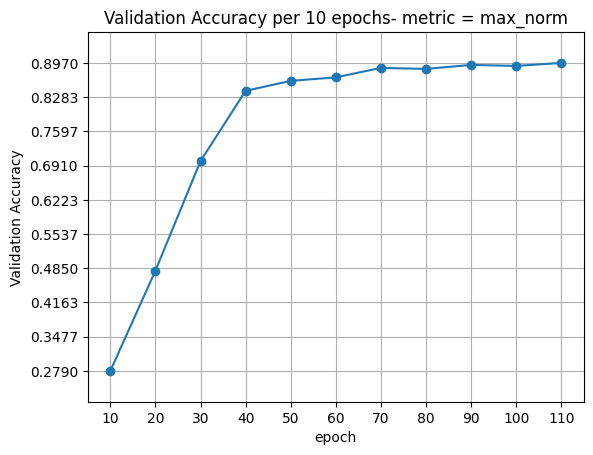

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Let's say you want to plot 'value1' as the y-axis
y_column = 'test11'

# Plot for each metric
for metric in grouped_df['metric'].unique():
    subset = grouped_df[grouped_df['metric'] == metric]
    plt.plot(subset['threshold'], subset[y_column], marker='o', label=f'Metric {metric}')

    plt.xlabel('Threshold')
    plt.ylabel(y_column)
    plt.title(f'test accuracy vs Threshold- metric = {metric}')
    plt.grid(True)
    y_min = min(subset[y_column])
    y_max = max(subset[y_column])
    y_range = y_max - y_min

    # Adding extra space on the y-axis to make it symmetric
    plt.ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)
    

    ticks = np.linspace(y_min, y_max, num=10)  # Adjust `num` for more or fewer ticks
    plt.yticks(ticks)
    plt.show()

for metric in grouped_df['metric'].unique():
    subset = grouped_df[grouped_df['metric'] == metric]
    max_test_acc = subset.loc[subset['test11'].idxmax()]
    y_values = max_test_acc[[f'val{i+1}' for i in range(11)]].values

    x_values = [(i+1)*10 for i in range(len(y_values))]
    plt.plot(x_values, y_values, marker='o')

    plt.xlabel('epoch')
    plt.ylabel('Validation Accuracy')
    plt.title(f'Validation Accuracy per 10 epochs- metric = {metric}')
    
    plt.grid(True)
    y_min = min(y_values)
    y_max = max(y_values)
    y_range = y_max - y_min
    plt.ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)
    ticks = np.linspace(y_min, y_max, num=10)
    plt.yticks(ticks)
    plt.xticks(x_values)
    plt.show()
